<a href="https://colab.research.google.com/github/sthite175/DeepLearning_Graphes_Leaves_disease_11_08_2023/blob/main/11_08_2023_CROP_WEED_IMAGES_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
#!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops
!kaggle datasets download -d rm1000/grape-disease-dataset-original

 91% 137M/151M [00:01<00:00, 81.3MB/s]
100% 151M/151M [00:01<00:00, 79.2MB/s]


In [4]:
 !chmod 600 ~/.kaggle/kaggle.json

In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = "/content/grape-disease-dataset-original.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve,precision_recall_curve

import tensorflow as tf
from tensorflow import keras

In [7]:
folder_path=os.listdir("/content/Original Data")
folder_path

['train', 'test']

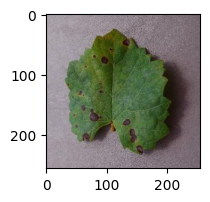

In [8]:
# image of Black Rot
black_rot="/content/Original Data/train/Black Rot/00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376_flipLR.JPG"
plt.figure(figsize=(2,2))
img=mpimg.imread(black_rot)
img_plot=plt.imshow(img)
plt.show()

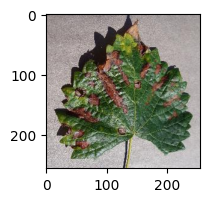

In [9]:
esca="/content/Original Data/train/ESCA/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG"
plt.figure(figsize=(2,2))
img=mpimg.imread(esca)
img_plot=plt.imshow(img)
plt.show()

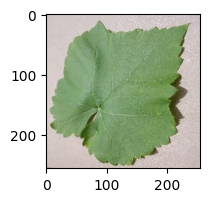

In [10]:
healthy="/content/Original Data/train/Healthy/00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG"
plt.figure(figsize=(2,2))
img=mpimg.imread(healthy)
img_plot=plt.imshow(img)
plt.show()

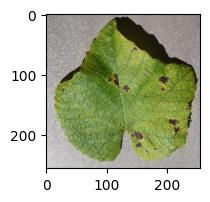

In [11]:
leaf_blight="/content/Original Data/train/Leaf Blight/0001aa74-bbd7-433b-a900-1dccab39d521___FAM_L.Blight 4508.JPG"
plt.figure(figsize=(2,2))
img=mpimg.imread(leaf_blight)
img_plot=plt.imshow(img)
plt.show()

In [12]:
train="/content/Original Data/train"
black_rot="/content/Original Data/train/Black Rot/00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376_flipLR.JPG"

In [13]:
# data1=[]
# for img_file in daisy_file:
#   image=Image.open(daisy_path+img_file)
#   image=image.resize((150,150))
#   image=image.convert('RGB')
#   image=np.array(image)
#   data1.append(image)

In [14]:
train_path=os.listdir("/content/Original Data/train")
train_path

['Leaf Blight', 'ESCA', 'Black Rot', 'Healthy']

In [15]:
test_path=os.listdir("/content/Original Data/test")
test_path

['Leaf Blight', 'ESCA', 'Black Rot', 'Healthy']

In [16]:
black_rot=os.listdir("/content/Original Data/train/Black Rot")
len(black_rot)

1888

In [17]:
black_rot[:5]

['6d315a9e-3773-473c-bb88-64160bc7f480___FAM_B.Rot 3273.JPG',
 '2811c5a0-6f98-413d-bd3a-08f34fde27ec___FAM_B.Rot 3152.JPG',
 '3b840038-8831-4158-ab4a-8eeee954d136___FAM_B.Rot 3307.JPG',
 '29a79416-7d6b-45b9-b48e-c40ca10bde21___FAM_B.Rot 0617.JPG',
 '308ebcde-71d3-4ade-ba8c-1447def723a0___FAM_B.Rot 5045_flipLR.JPG']

In [18]:
# Folder of images
black_rot=os.listdir("/content/Original Data/train/Black Rot")
esca=os.listdir("/content/Original Data/train/ESCA")
healthy=os.listdir("/content/Original Data/train/Healthy")
leaf_blight=os.listdir("/content/Original Data/train/Leaf Blight")

# Path of folder
black_path="/content/Original Data/train/Black Rot/"
esca_path="/content/Original Data/train/ESCA/"
healthy_path="/content/Original Data/train/Healthy/"
leaf_blight_path="/content/Original Data/train/Leaf Blight/"

In [19]:
# Label
print(len(black_rot))
print(len(esca))
print(len(healthy))
print(len(leaf_blight))

1888
1920
1692
1722


In [20]:
# Label
black_rot_l=[0]*len(black_rot)
esca_l=[1]*len(esca)
healthy_l=[2]*len(healthy)
leaf_blight_l=[3]*len(leaf_blight)
label=black_rot_l + esca_l + healthy_l + leaf_blight_l

In [21]:
len(label)

7222

In [22]:
label[:5]

[0, 0, 0, 0, 0]

In [23]:
label[-5:]

[3, 3, 3, 3, 3]

In [24]:
# data of all images
data=[]
for im in black_rot:
  image=Image.open(black_path+im)
  image=image.resize((180,180))
  image=np.array(image)
  data.append(image)

for im in esca:
  image=Image.open(esca_path+im)
  image=image.resize((180,180))
  image=np.array(image)
  data.append(image)

for im in healthy:
  image=Image.open(healthy_path+im)
  image=image.resize((180,180))
  image=np.array(image)
  data.append(image)

for im in leaf_blight:
  image=Image.open(leaf_blight_path+im)
  image=image.resize((180,180))
  image=np.array(image)
  data.append(image)

In [25]:
label[:4]

[0, 0, 0, 0]

In [26]:
len(data)

7222

In [27]:
data[0]

array([[[194, 190, 189],
        [194, 190, 189],
        [185, 181, 180],
        ...,
        [144, 134, 132],
        [165, 155, 153],
        [154, 144, 142]],

       [[183, 179, 178],
        [190, 186, 185],
        [183, 179, 178],
        ...,
        [146, 136, 134],
        [139, 129, 127],
        [159, 149, 147]],

       [[186, 182, 181],
        [186, 182, 181],
        [180, 176, 175],
        ...,
        [139, 129, 127],
        [139, 129, 127],
        [169, 159, 157]],

       ...,

       [[158, 148, 146],
        [156, 146, 144],
        [162, 152, 150],
        ...,
        [150, 137, 131],
        [143, 130, 124],
        [148, 135, 129]],

       [[157, 147, 145],
        [159, 149, 147],
        [170, 160, 158],
        ...,
        [150, 137, 131],
        [143, 130, 124],
        [153, 140, 134]],

       [[162, 152, 150],
        [157, 147, 145],
        [158, 148, 146],
        ...,
        [158, 145, 139],
        [147, 134, 128],
        [148, 135, 129]]

In [28]:
data[0].shape

(180, 180, 3)

In [29]:
x=np.array(data)
y=np.array(label)

In [30]:
print(x.shape)
print(y.shape)

(7222, 180, 180, 3)
(7222,)


In [31]:
# Split The Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5416, 180, 180, 3)
(1806, 180, 180, 3)
(5416,)
(1806,)


In [32]:
y_train

array([3, 0, 0, ..., 3, 3, 1])

In [33]:
x_train[0]

array([[[177, 175, 176],
        [161, 159, 160],
        [169, 167, 168],
        ...,
        [152, 147, 144],
        [164, 159, 156],
        [155, 150, 147]],

       [[168, 166, 167],
        [171, 169, 170],
        [158, 156, 157],
        ...,
        [160, 155, 152],
        [171, 166, 163],
        [156, 151, 148]],

       [[174, 172, 173],
        [171, 169, 170],
        [166, 164, 165],
        ...,
        [162, 157, 154],
        [167, 162, 159],
        [155, 150, 147]],

       ...,

       [[191, 189, 190],
        [192, 190, 191],
        [192, 190, 191],
        ...,
        [183, 180, 175],
        [182, 179, 174],
        [188, 185, 180]],

       [[191, 189, 190],
        [192, 190, 191],
        [193, 191, 192],
        ...,
        [185, 182, 177],
        [186, 183, 178],
        [189, 186, 181]],

       [[193, 191, 192],
        [194, 192, 193],
        [194, 192, 193],
        ...,
        [187, 184, 179],
        [189, 186, 181],
        [188, 185, 180]]

In [34]:
# Scale The data
x_train_scale=x_train/255
x_test_scale=x_test/255

In [35]:
x_train_scale[0]

array([[[0.69411765, 0.68627451, 0.69019608],
        [0.63137255, 0.62352941, 0.62745098],
        [0.6627451 , 0.65490196, 0.65882353],
        ...,
        [0.59607843, 0.57647059, 0.56470588],
        [0.64313725, 0.62352941, 0.61176471],
        [0.60784314, 0.58823529, 0.57647059]],

       [[0.65882353, 0.65098039, 0.65490196],
        [0.67058824, 0.6627451 , 0.66666667],
        [0.61960784, 0.61176471, 0.61568627],
        ...,
        [0.62745098, 0.60784314, 0.59607843],
        [0.67058824, 0.65098039, 0.63921569],
        [0.61176471, 0.59215686, 0.58039216]],

       [[0.68235294, 0.6745098 , 0.67843137],
        [0.67058824, 0.6627451 , 0.66666667],
        [0.65098039, 0.64313725, 0.64705882],
        ...,
        [0.63529412, 0.61568627, 0.60392157],
        [0.65490196, 0.63529412, 0.62352941],
        [0.60784314, 0.58823529, 0.57647059]],

       ...,

       [[0.74901961, 0.74117647, 0.74509804],
        [0.75294118, 0.74509804, 0.74901961],
        [0.75294118, 0

In [36]:
x_train_scale.shape

(5416, 180, 180, 3)

## Model 1

In [37]:
model=tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(180,180,3)),
    # Convolution Layer
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3), strides=(1,1) ,activation='relu', padding='same'),
    # Pooling Layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # 2nd Convolution Layer
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3), strides=(1,1) ,activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # 3rd Convolution Layer
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3), strides=(1,1) ,activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(units=100,activation='relu'),
    tf.keras.layers.Dense(units=80,activation='relu'),
    tf.keras.layers.Dense(units=4,activation='softmax'),
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history=model.fit(x_train_scale , y_train , epochs=20)

Epoch 1/20
 71/170 [===========>..................] - ETA: 1:56 - loss: 0.7192 - accuracy: 0.6787

KeyboardInterrupt: ignored

In [ ]:
model.summary()

In [ ]:
model.